# Economic Freedom of the World - Data Analysis

## Objective
- Tujuan awal dari analisa dataset berikut ini adalah untuk mengetahui statistik descriptive dari dataset.
- Kemudian untuk mengetahui peluang kondisi tertentu seperti peluang sebuah negara memiliki nilai uang yang tinggi.
- Selanjutnya untuk mencari hubungan variable terhadap nilai uang yang dimiliki.
- Terakhir, melakukan uji hypothesis untuk menguji klaim terhadap nilai ekonomi.

## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

## Data Loading

In [2]:
# load the dataset
df = pd.read_excel('Economic Freedom of the World.xlsx')
df.head()

,Year,ISO_Code,Countries,Summary Index,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
0,2015,ALB,Albania,7.543627,7.963672,5.003489,9.585625,8.112452,7.052895
1,2015,DZA,Algeria,4.842521,3.559961,4.551817,6.852790,4.008432,5.239606
2,2015,AGO,Angola,5.402199,5.955686,2.960264,6.885465,5.143998,6.065583
3,2015,ARG,Argentina,4.877356,4.869799,3.816362,6.455331,3.730787,5.514501
4,2015,ARM,Armenia,7.602355,7.117733,5.777804,9.481225,8.242619,7.392394


In [3]:
df.describe(include='all')

,Year,ISO_Code,Countries,Summary Index,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
count,3498.000000,3498,3498,2835.000000,2907.000000,2789.000000,2954.000000,2836.000000,2829.000000
unique,NaN,159,159,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,ALB,Albania,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,22,22,NaN,NaN,NaN,NaN,NaN,NaN
mean,2000.681818,NaN,NaN,6.470740,6.133165,5.159517,7.585998,6.745167,6.644243
std,12.623526,NaN,NaN,1.147788,1.564839,1.746661,1.903306,1.677211,1.248157
min,1970.000000,NaN,NaN,1.820347,0.292166,0.933759,0.000000,0.000000,1.061704
25%,1995.000000,NaN,NaN,5.816003,5.146012,3.936008,6.591907,6.110901,5.892104
50%,2004.500000,NaN,NaN,6.624187,6.255356,5.119274,7.898353,7.029340,6.774569
75%,2010.000000,NaN,NaN,7.318251,7.228677,6.275357,9.230373,7.893344,7.521549


In [4]:
# Check for missing values in the Economic Freedom dataset
missing_values_count = df.isnull().sum()
missing_values_count[missing_values_count > 0]

Summary Index                       663
Size of Government                  591
Legal System & Property Rights      709
Sound Money                         544
Freedom to trade internationally    662
Regulation                          669
dtype: int64

## Handling Missing Values

In [5]:
# Create a copy of the original DataFrame
df2 = df.copy()
for col in df2.select_dtypes(include=[np.number]).columns:
    df2[col].fillna(df2[col].mean(), inplace=True)
df2.head()

,Year,ISO_Code,Countries,Summary Index,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
0,2015,ALB,Albania,7.543627,7.963672,5.003489,9.585625,8.112452,7.052895
1,2015,DZA,Algeria,4.842521,3.559961,4.551817,6.852790,4.008432,5.239606
2,2015,AGO,Angola,5.402199,5.955686,2.960264,6.885465,5.143998,6.065583
3,2015,ARG,Argentina,4.877356,4.869799,3.816362,6.455331,3.730787,5.514501
4,2015,ARM,Armenia,7.602355,7.117733,5.777804,9.481225,8.242619,7.392394


## Adding Features

In [6]:
# Calculate the 25th, 50th, and 75th percentiles for 'Summary Index'
percentiles = df2['Summary Index'].describe(percentiles=[.25, .5, .75])

# Define bin edges based on the percentiles
bin_edges = [df2['Summary Index'].min(), percentiles['25%'], percentiles['50%'], percentiles['75%'], df2['Summary Index'].max()]

# Create a new column 'Summary Index Category' by binning the 'Summary Index'
df2['Summary Index Category'] = pd.cut(df2['Summary Index'], bins=bin_edges, labels=['Low', 'Medium', 'High', 'Very High'])

# Display the first few rows to see the new column
df2[['Summary Index', 'Summary Index Category']].head()


,Summary Index,Summary Index Category
0,7.543627,Very High
1,4.842521,Low
2,5.402199,Low
3,4.877356,Low
4,7.602355,Very High


In [7]:
# to use df2 from now on
df2.describe(include='all')

,Year,ISO_Code,Countries,Summary Index,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,Summary Index Category
count,3498.000000,3498,3498,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3497
unique,NaN,159,159,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,ALB,Albania,NaN,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,22,22,NaN,NaN,NaN,NaN,NaN,NaN,1047
mean,2000.681818,NaN,NaN,6.470740,6.133165,5.159517,7.585998,6.745167,6.644243,NaN
std,12.623526,NaN,NaN,1.033270,1.426493,1.559578,1.749011,1.510137,1.122435,NaN
min,1970.000000,NaN,NaN,1.820347,0.292166,0.933759,0.000000,0.000000,1.061704,NaN
25%,1995.000000,NaN,NaN,6.000166,5.387298,4.216580,6.766871,6.325177,6.187171,NaN
50%,2004.500000,NaN,NaN,6.470740,6.133165,5.159517,7.585998,6.745167,6.644243,NaN
75%,2010.000000,NaN,NaN,7.170329,7.019421,5.927118,9.030982,7.701710,7.342484,NaN


In [8]:
# Since the number of rows in index category is less than the others, we're checking for any missing values
nan_summary_index_category_rows = df2[df2['Summary Index Category'].isna()]

nan_summary_index_category_rows.head()


,Year,ISO_Code,Countries,Summary Index,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,Summary Index Category
2968,1985,NIC,Nicaragua,1.820347,2.813964,2.174055,0.0,0.823451,3.20505,NaN


In [9]:
# Replacing the NaN values with 'Very Low' as it is the minimum index when checked in described
# Add 'Very Low' to the existing categories
new_categories = df2['Summary Index Category'].cat.categories.tolist() + ['Very Low']

# Set the new categories
df2['Summary Index Category'] = df2['Summary Index Category'].cat.set_categories(new_categories)

# Replace nan
df2['Summary Index Category'].fillna('Very Low', inplace=True)

# Show collumn details
df2.describe(include='all')


,Year,ISO_Code,Countries,Summary Index,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,Summary Index Category
count,3498.000000,3498,3498,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498
unique,NaN,159,159,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,ALB,Albania,NaN,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,22,22,NaN,NaN,NaN,NaN,NaN,NaN,1047
mean,2000.681818,NaN,NaN,6.470740,6.133165,5.159517,7.585998,6.745167,6.644243,NaN
std,12.623526,NaN,NaN,1.033270,1.426493,1.559578,1.749011,1.510137,1.122435,NaN
min,1970.000000,NaN,NaN,1.820347,0.292166,0.933759,0.000000,0.000000,1.061704,NaN
25%,1995.000000,NaN,NaN,6.000166,5.387298,4.216580,6.766871,6.325177,6.187171,NaN
50%,2004.500000,NaN,NaN,6.470740,6.133165,5.159517,7.585998,6.745167,6.644243,NaN
75%,2010.000000,NaN,NaN,7.170329,7.019421,5.927118,9.030982,7.701710,7.342484,NaN


## Descriptive Statistics

#### Question 1
##### What is the average Summary Index across all countries?

In [10]:
avg_summary_index = df2['Summary Index'].mean()
print(f"Answer: {avg_summary_index}")

Answer: 6.470739624242382


#### Question 2
##### Which year has the highest average Size of Government?

In [11]:
highest_gov_size_by_year = df2.groupby('Year')['Size of Government'].mean().idxmax()
print(f"Answer: {highest_gov_size_by_year}")

Answer: 2007


#### Question 3
##### What is the median Sound Money score?

In [12]:
median_sound_money = df2['Sound Money'].median()
print(f"Answer: {median_sound_money}")

Answer: 7.585997546564995


#### Question 4
##### How many countries are in each year?

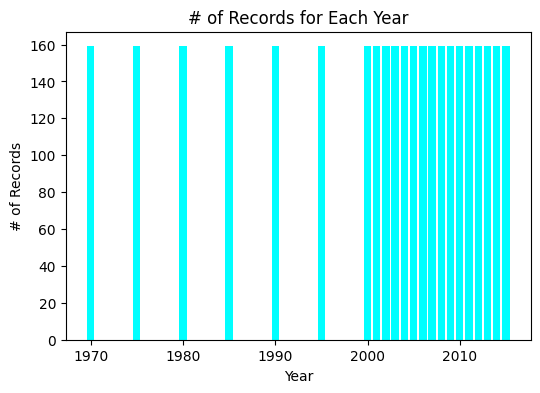

In [30]:
year_records = df2['Year'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(6, 4))
plt.bar(year_records.index, year_records.values, color='cyan')

# Add titles and labels
plt.title('# of Records for Each Year')
plt.xlabel('Year')
plt.ylabel('# of Records')

# Show the plot
plt.show()

#### Question 5
##### What is the standard deviation of the Legal System & Property Rights?

In [14]:
std_dev_legal_system = df2['Legal System & Property Rights'].std()
print(f"Answer: {std_dev_legal_system}")

Answer: 1.5595781168310623


## Discrete Variables

#### Question 1
##### How many countries fall under each Summary Index Category?

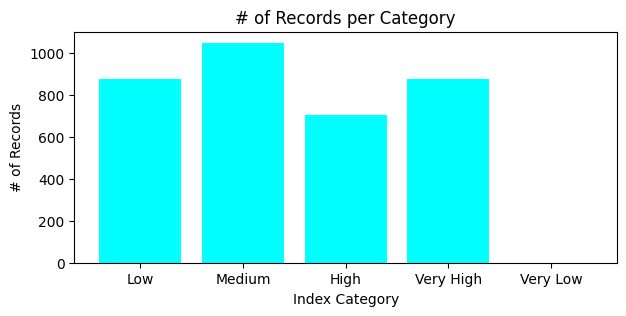

Answer: Summary Index Category
Low           874
Medium       1047
High          701
Very High     875
Very Low        1
Name: count, dtype: int64


In [37]:
index_category_records = df2['Summary Index Category'].value_counts().sort_index()
plt.figure(figsize=[7, 3])
plt.bar(index_category_records.index, index_category_records, color='cyan')

plt.xlabel('Index Category')
plt.ylabel('# of Records')
plt.title('# of Records per Category')

plt.show()
print(f"Answer: {index_category_records}")

#### Question 2
##### Which year has the most countries falling under the "Low" category in Summary Index?

In [17]:
year_most_low = df2[df2['Summary Index Category'] == 'Low'].groupby('Year').size().idxmax()
year_most_low_value = df2[df2['Summary Index Category'] == 'Low'].groupby('Year').size().value_counts().idxmax()
print(f"Answer: {year_most_low} = {year_most_low_value} Records")

Answer: 1985 = 28 Records


#### Question 3
##### What is the most frequent Summary Index Category over the years?

In [18]:
most_frequent_category = df2['Summary Index Category'].mode()[0]
print(f"Answer: {most_frequent_category}")

Answer: Medium


#### Question 4
##### Was there any years where no coutries is categorized as 'Very High'?

In [39]:
years_no_very_high = df2[df2['Summary Index Category'] == 'Very High']['Year'].unique()
years_no_very_high = set(df2['Year'].unique()) - set(years_no_very_high)

if not years_no_very_high:
    print("Answer: 0 or No")
else:
    print(f"Answer: {years_no_very_high}")

Answer: 0 or No


#### Question 5
##### Which Summary Index Category has the highest average Size of Government?

In [20]:
highest_avg_govt_category = df2.groupby('Summary Index Category')['Size of Government'].mean().idxmax()
print(f"Answer: {highest_avg_govt_category}")

Answer: High


## Continuous Variables

#### Question 1
##### Which is more likely to occur: a country having a Summary Index above 8 or a Summary Index below 5?

In [21]:
prob_summary_above_8 = round(len(df2[df2['Summary Index'] > 8]) / len(df2) * 100,2)
prob_summary_below_5 = round(len(df2[df2['Summary Index'] < 5]) / len(df2) * 100,2)
print(f"Answer: Above 8 Probability : {prob_summary_above_8} ")
print(f"        Below 5 Probability : {prob_summary_below_5} ")

Answer: Above 8 Probability : 4.06 
        Below 5 Probability : 9.41 


#### Question 2
##### What is the probability of a country having a Summary Index score above 9?

In [22]:
prob_sound_money_above_9 = round(len(df2[df2['Summary Index'] > 9]) / len(df2) * 100,2)
print(f"Answer: {prob_sound_money_above_9}")

Answer: 0.26


## Correlation Analysis

#### Question
##### Is there a strong correlation between Summary Index with Year and between Summary Index with Size of Goverment?

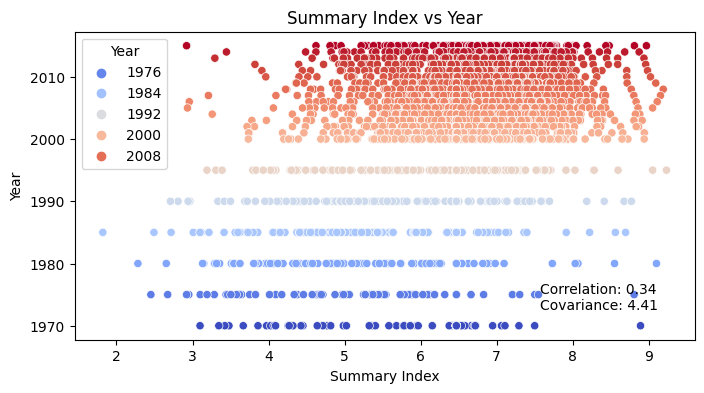

In [42]:
# Calculate the covariance and correlation between 'Year' and 'Summary Index'
filtered_df_legal = df2[['Summary Index', 'Year']].dropna()

# Create scatterplot
plt.figure(figsize=(8, 4))
sns.scatterplot(data=filtered_df_legal, x='Summary Index', y='Year', hue='Year', palette='coolwarm')

# Add titles and labels
plt.title('Summary Index vs Year')
plt.xlabel('Summary Index')
plt.ylabel('Year')

# Calculate the covariance & correlation
covariance_legal = filtered_df_legal['Year'].cov(filtered_df_legal['Summary Index'])
correlation_legal = filtered_df_legal['Year'].corr(filtered_df_legal['Summary Index'])

# Display covariance and correlation on the plot
plt.annotate(f"Covariance: {covariance_legal:.2f}", xy=(0.75, 0.10), xycoords='axes fraction')
plt.annotate(f"Correlation: {correlation_legal:.2f}", xy=(0.75, 0.15), xycoords='axes fraction')

# Show the plot
plt.show()


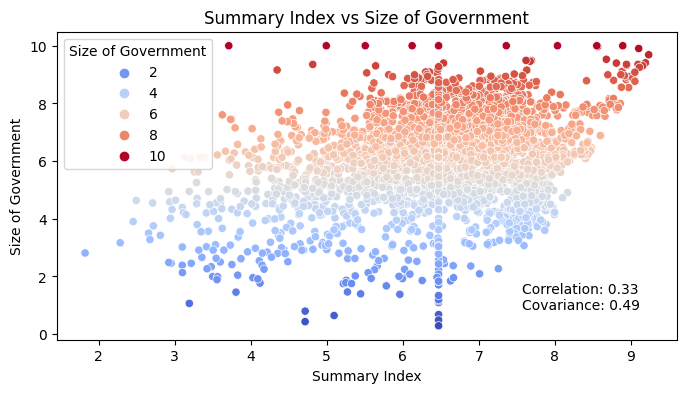

In [40]:
# Calculate the covariance and correlation between 'Size of Government' and 'Summary Index'
filtered_df_legal = df2[['Summary Index', 'Size of Government']].dropna()

# Create scatterplot
plt.figure(figsize=(8, 4))
sns.scatterplot(data=filtered_df_legal, x='Summary Index', y='Size of Government', hue='Size of Government', palette='coolwarm')

# Add titles and labels
plt.title('Summary Index vs Size of Government')
plt.xlabel('Summary Index')
plt.ylabel('Size of Government')

# Calculate the covariance & correlation
covariance_legal = filtered_df_legal['Size of Government'].cov(filtered_df_legal['Summary Index'])
correlation_legal = filtered_df_legal['Size of Government'].corr(filtered_df_legal['Summary Index'])

# Display covariance and correlation on the plot
plt.annotate(f"Covariance: {covariance_legal:.2f}", xy=(0.75, 0.10), xycoords='axes fraction')
plt.annotate(f"Correlation: {correlation_legal:.2f}", xy=(0.75, 0.15), xycoords='axes fraction')

# Show the plot
plt.show()


## Hypothesis Testing

#### Hypothesis 1
##### Lower legal system for low summary index scores compared with higher scores?

In [48]:
# Prepare the data
low_summary_index_legal = df2[df2['Summary Index Category'].isin(['Very Low','Low', 'Medium'])]['Legal System & Property Rights'].dropna()
high_summary_index_legal = df2[df2['Summary Index Category'].isin(['High', 'Very High'])]['Legal System & Property Rights'].dropna()

# Perform t-tests
t_stat_legal, p_value_legal = ttest_ind(low_summary_index_legal, high_summary_index_legal, alternative='less')

print(f"t-statistic: {t_stat_legal}")
print(f"p-value: {p_value_legal}")


t-statistic: -38.69785098834282
p-value: 2.738648708139139e-273


#### Hypothesis 2
##### Higher Regulation for high summary index compared to low index

In [54]:
# Prepare the data
low_summary_index_regulation = df2[df2['Summary Index Category'].isin(['Very Low','Low', 'Medium'])]['Regulation'].dropna()
high_summary_index_regulation = df2[df2['Summary Index Category'].isin(['High', 'Very High'])]['Regulation'].dropna()

# Perform t-tests
t_stat_regulation, p_value_regulation = ttest_ind(high_summary_index_regulation, low_summary_index_regulation, alternative='greater')

print(f"t-statistic: {t_stat_regulation}")
print(f"p-value: {p_value_regulation}")


t-statistic: 43.990243970410134
p-value: 0.0


#### Hypothesis 3
##### Better summary index countries has better freedom compared to lesser

In [50]:
# Prepare the data
low_summary_index_freedom = df2[df2['Summary Index Category'].isin(['Very Low','Low', 'Medium'])]['Freedom to trade internationally'].dropna()
high_summary_index_freedom = df2[df2['Summary Index Category'].isin(['High', 'Very High'])]['Freedom to trade internationally'].dropna()

# Perform t-tests
t_stat_freedom, p_value_freedom = ttest_ind(high_summary_index_freedom, low_summary_index_freedom, alternative='greater')

print(f"t-statistic: {t_stat_freedom}")
print(f"p-value: {p_value_freedom}")


t-statistic: 41.79841873121914
p-value: 2.4497844492919e-310
